In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
file = 'MagicBricks.csv'
data = pd.read_csv(file)
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt

In [4]:
print('Rows :', data.shape[0])
print('Columns :', data.shape[1])
print('\n Features', data.columns.tolist())
print('\n Missing Values', data.isnull().sum().values.sum())
print('\nUnique Values', data.nunique())

Rows : 1259
Columns : 11

 Features ['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price', 'Status', 'Transaction', 'Type', 'Per_Sqft']

 Missing Values 286

Unique Values Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       251
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [6]:
data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [7]:
print(data['Type'].unique())
print(data['Transaction'].unique())
print(data['Status'].unique())
print(data['Furnishing'].unique())

['Builder_Floor' 'Apartment' nan]
['New_Property' 'Resale']
['Ready_to_move' 'Almost_ready']
['Semi-Furnished' 'Furnished' 'Unfurnished' nan]


<AxesSubplot:>

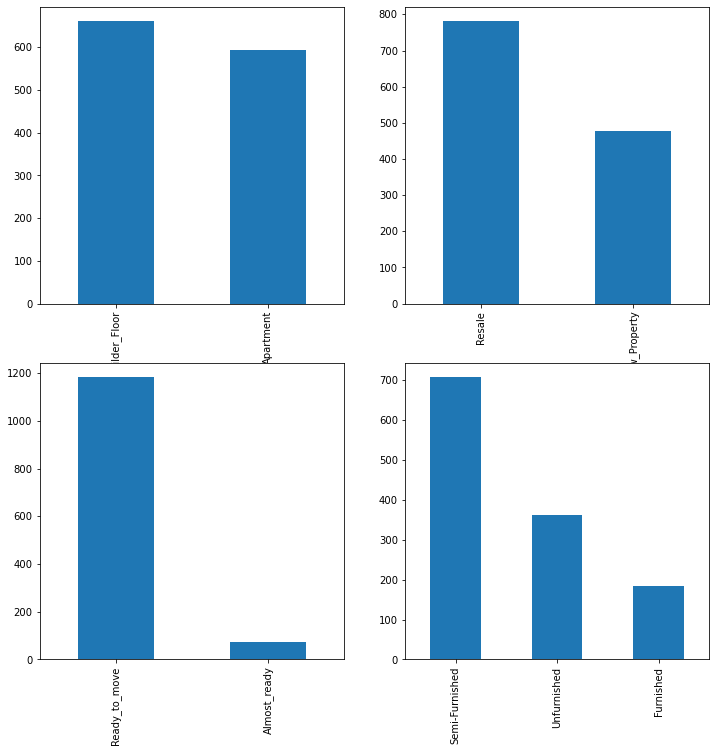

In [8]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
data['Type'].value_counts().plot(kind='bar')
plt.subplot(2,2,2)
data['Transaction'].value_counts().plot(kind='bar')
plt.subplot(2,2,3)
data['Status'].value_counts().plot(kind='bar')
plt.subplot(2,2,4)
data['Furnishing'].value_counts().plot(kind='bar')

In [9]:
corr = data.corr()
corr

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
Area,1.000000,0.449438,0.535104,-0.009297,0.580836,0.162832
BHK,0.449438,1.000000,0.773267,-0.070707,0.571523,0.181540
Bathroom,0.535104,0.773267,1.000000,-0.032796,0.728108,0.219169
Parking,-0.009297,-0.070707,-0.032796,1.000000,-0.000448,0.001607
Price,0.580836,0.571523,0.728108,-0.000448,1.000000,0.322859
Per_Sqft,0.162832,0.181540,0.219169,0.001607,0.322859,1.000000


<AxesSubplot:>

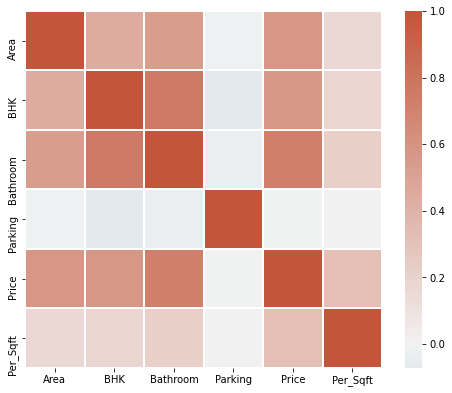

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap=sns.diverging_palette(220,20,as_cmap=True), vmax=1, center=0, square=True, linewidths=.8, cbar_kws={'shrink':.82}  )

In [11]:
corr['Price'].sort_values(ascending=False)

Price       1.000000
Bathroom    0.728108
Area        0.580836
BHK         0.571523
Per_Sqft    0.322859
Parking    -0.000448
Name: Price, dtype: float64

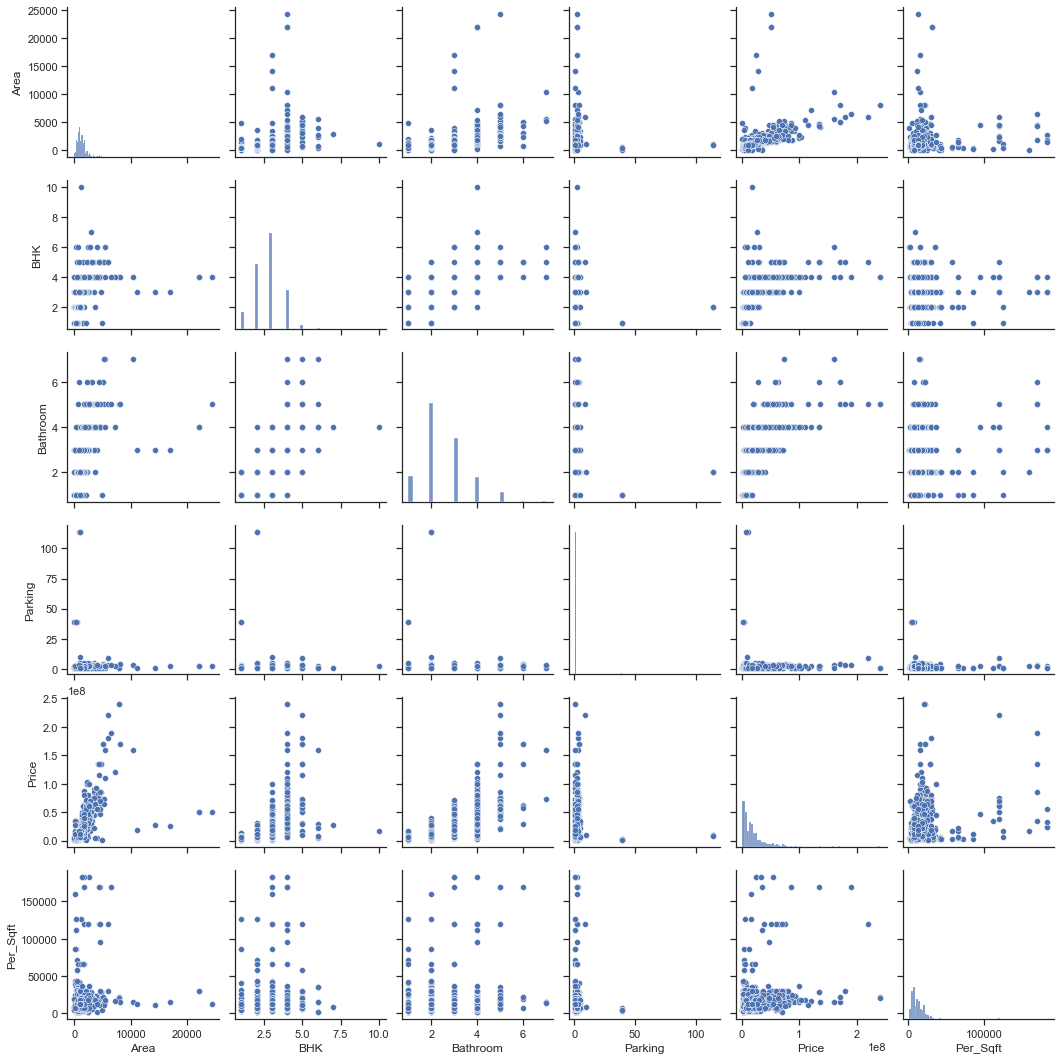

In [12]:
sns.set(style="ticks")
sns.pairplot(data, palette=["#FA5858", "#58D3F7"])

<AxesSubplot:xlabel='Price', ylabel='Bathroom'>

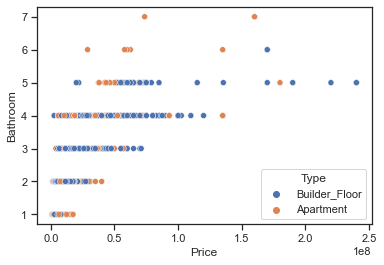

In [13]:
sns.scatterplot(x='Price',y = 'Bathroom',data=data, hue='Type')

In [14]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


C:\Users\Rishabh Nigam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rishabh Nigam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rishabh Nigam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='Bathroom'>

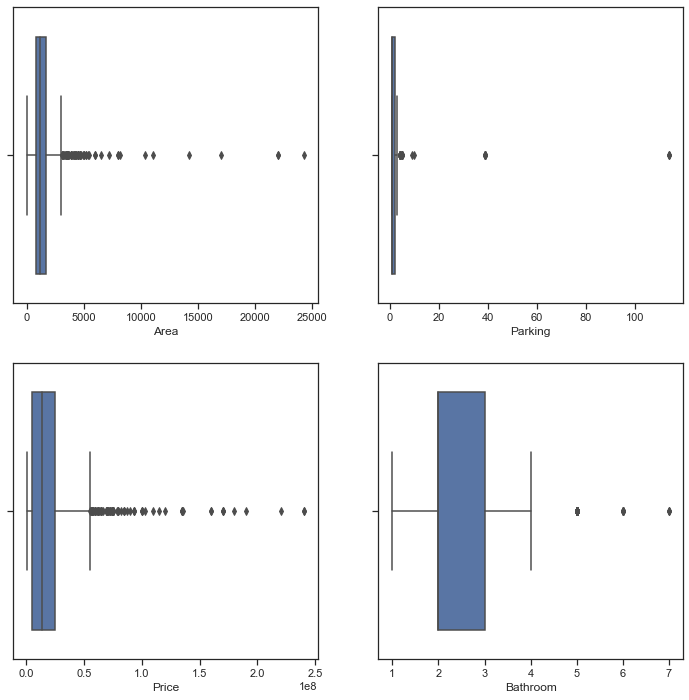

In [15]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot('Area',data=data)
plt.subplot(2,2,2)
sns.boxplot('Parking',data=data)
plt.subplot(2,2,3)
sns.boxplot('Price',data=data)
plt.subplot(2,2,4)
sns.boxplot('Bathroom',data=data)

In [16]:
print(data.groupby('Type')['Price'].median())
print(data.groupby('Bathroom')['Price'].median())
print(data.groupby('Furnishing')['Price'].median())


Type
Apartment        14500000
Builder_Floor    13500000
Name: Price, dtype: int64
Bathroom
1.0      2500000
2.0      8500000
3.0     22500000
4.0     47500000
5.0     62500000
6.0     62500000
7.0    160000000
Name: Price, dtype: int64
Furnishing
Furnished         14000000
Semi-Furnished    15000000
Unfurnished       11500000
Name: Price, dtype: int64


In [17]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [18]:
data = data.dropna()

In [19]:
data.isnull().sum().values.sum()

0

In [20]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector 24,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [21]:
Loc = pd.DataFrame(data.groupby('Locality')['Price','Bathroom'].min())
Loc.head(10)

<ipython-input-21-076bc70109d5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Loc = pd.DataFrame(data.groupby('Locality')['Price','Bathroom'].min())


,Price,Bathroom
Locality,,
"APL Builder Floor, Greater Kailash 1",60000000,3.0
"Abhimanyu Apartments, Vasundhara Enclave",11600000,3.0
"Abul Fazal Enclave Part 1, Okhla",3600000,1.0
"Abul Fazal Enclave Part-II, Okhla",3100000,2.0
"Adarsh Homes, Dwarka Mor",3000000,2.0
"Ahinsha Vatika, Ram Nagar, Shahdara",7300000,2.0
Alaknanda,3000000,1.0
"Amar Colony, Lajpat Nagar",13000000,2.0
"Andheria Mor, Mehrauli",1500000,1.0


In [22]:
data = data.drop(['Locality','Furnishing','Status','Transaction'], axis=1)
data.head()

,Area,BHK,Bathroom,Parking,Price,Type,Per_Sqft
1,750.0,2,2.0,1.0,5000000,Apartment,6667.0
2,950.0,2,2.0,1.0,15500000,Apartment,6667.0
3,600.0,2,2.0,1.0,4200000,Builder_Floor,6667.0
4,650.0,2,2.0,1.0,6200000,Builder_Floor,6667.0
5,1300.0,4,3.0,1.0,15500000,Builder_Floor,6667.0


In [23]:
cat = ['Type']
data = pd.get_dummies(data, columns=cat, drop_first = True)
data.head()
print(len(data.columns))

7


In [24]:
data = data.reset_index()
data.head()

,index,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Type_Builder_Floor
0,1,750.0,2,2.0,1.0,5000000,6667.0,0
1,2,950.0,2,2.0,1.0,15500000,6667.0,0
2,3,600.0,2,2.0,1.0,4200000,6667.0,1
3,4,650.0,2,2.0,1.0,6200000,6667.0,1
4,5,1300.0,4,3.0,1.0,15500000,6667.0,1


In [25]:
X = data.drop(['Price'], axis=1)
Y = data['Price']

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [26]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

pred = model_1.predict(X_test)

print('R2 Score for Linear Regression: ',r2_score(Y_test, pred))

rmse = sqrt(mean_squared_error(Y_test,pred))
print('RMSE value for Linear Regression: ',rmse)

pred_cv = cross_val_predict(model_1, X, Y, cv=10)
print('R2 score for Linear Regression( Cross Validation ): ',r2_score(Y, pred_cv))

res = pd.DataFrame({'Actual':Y_test, 'Predicted':pred})
print('\n',res.head(10))

R2 Score for Linear Regression:  0.6107632881489391
RMSE value for Linear Regression:  18993020.352584176
R2 score for Linear Regression( Cross Validation ):  0.5525287664625691

         Actual     Predicted
710    3000000 -6.736825e+06
666    6000000  9.189991e+06
298   30000000  2.658452e+07
356    2000000 -5.917924e+06
571   36500000  3.104820e+07
1000  55000000  6.806141e+07
27     5000000  6.368575e+06
231   70000000  6.481060e+07
306   16000000 -2.448058e+06
764    7500000  9.893199e+06


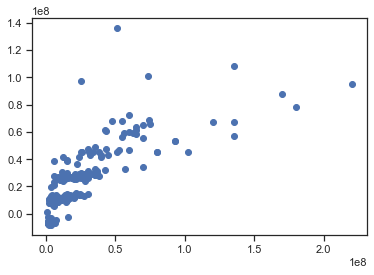

In [27]:
import matplotlib.pyplot as plt

plt.scatter(x=Y_test, y=pred)
plt.show()

In [28]:
poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(X_train)
x_test = poly.fit_transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(x_train,Y_train)

pred = poly_reg.predict(x_test)
print('R2 score for Polynomial Regression',r2_score(Y_test, pred))

R2 score for Polynomial Regression 0.7639557809560658


In [29]:
model_2 = DecisionTreeRegressor(max_depth=4)
model_2.fit(X_train,Y_train)
pred = model_2.predict(X_test)

print('R2 Score for Linear Regression: ',r2_score(Y_test, pred))

rmse = sqrt(mean_squared_error(Y_test,pred))
print('RMSE value for Linear Regression: ',rmse)

pred_cv = cross_val_predict(model_2, X, Y, cv=10)
print('R2 score for Linear Regression( Cross Validation ): ',r2_score(Y, pred_cv))

res = pd.DataFrame({'Actual':Y_test, 'Predicted':pred})
print('\n',res.head(10))

R2 Score for Linear Regression:  0.7638391880831831
RMSE value for Linear Regression:  14794185.254516063
R2 score for Linear Regression( Cross Validation ):  0.6646526531975419

         Actual     Predicted
710    3000000  9.093631e+06
666    6000000  3.949812e+06
298   30000000  3.053108e+07
356    2000000  3.949812e+06
571   36500000  5.492115e+07
1000  55000000  3.719444e+07
27     5000000  9.093631e+06
231   70000000  7.024000e+07
306   16000000  9.093631e+06
764    7500000  9.093631e+06


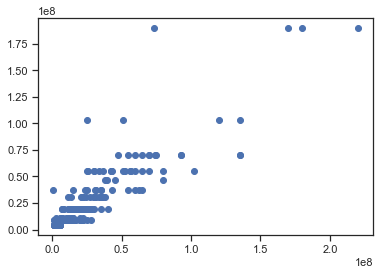

In [30]:
import matplotlib.pyplot as plt

plt.scatter(x=Y_test, y=pred)
plt.show()

In [31]:
model_3 = RandomForestRegressor(n_estimators=400,max_depth=7)
model_3.fit(X_train,Y_train)
pred = model_3.predict(X_test)

print('R2 Score for Linear Regression: ',r2_score(Y_test, pred))

rmse = sqrt(mean_squared_error(Y_test,pred))
print('RMSE value for Linear Regression: ',rmse)

pred_cv = cross_val_predict(model_3, X, Y, cv=10)
print('R2 score for Linear Regression( Cross Validation ): ',r2_score(Y, pred_cv))

res = pd.DataFrame({'Actual':Y_test, 'Predicted':pred})
print('\n',res.head(10))

R2 Score for Linear Regression:  0.8703573118622655
RMSE value for Linear Regression:  10961276.923933087
R2 score for Linear Regression( Cross Validation ):  0.7896253697924248

         Actual     Predicted
710    3000000  2.884832e+06
666    6000000  4.779534e+06
298   30000000  2.696193e+07
356    2000000  2.369257e+06
571   36500000  3.839770e+07
1000  55000000  7.439105e+07
27     5000000  6.753294e+06
231   70000000  7.368758e+07
306   16000000  7.260223e+06
764    7500000  8.068504e+06


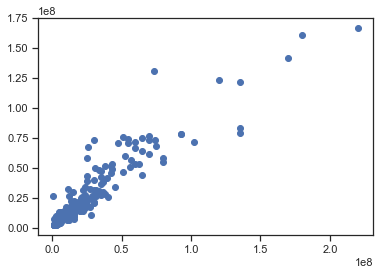

In [32]:
import matplotlib.pyplot as plt

plt.scatter(x=Y_test, y=pred)
plt.show()
